In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# !pip install statsmodels
# import statsmodels.api as sm

#%load_ext lab_black

#pd.set_option("max_columns", 500)

In [2]:
df = pd.read_csv("df_norm_3_time_all_median.csv")

In [4]:
# new columnn for exp_pos_cell_rel
df["exp_pos_cell_rel"] = (
    df["experiment_foldername"]
    + "_"
    + df["Position_n"].astype(str)
    + "_"
    + df["relative_ID"].astype(str)
)
df

,Unnamed: 0,experiment_foldername,Position_n,frame_i,Cell_ID,relationship,relative_ID,cell_vol_fl,division_frame_i,emerg_frame_i,...,ng_norm_factor,mkate_norm_factor,_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm,h,lifetime,time_start,time_end,time_alive,exp_pos_cell_rel
0,0,exp5,Position_1,0,4,mother,-1.0,192.422420,-1.0,-1.0,...,995.254531,563.957893,1.000000,1.000000,0.500000,8.00,0.00,8.0,0.00,exp5_Position_1_-1.0
1,1,exp5,Position_1,1,4,mother,-1.0,231.171137,-1.0,-1.0,...,916.479753,527.853218,1.000000,1.000000,0.500000,8.00,0.00,8.0,0.25,exp5_Position_1_-1.0
2,2,exp5,Position_1,2,4,mother,12.0,225.112696,-1.0,-1.0,...,1829.195543,918.273603,0.524774,0.607137,0.536382,8.00,0.00,8.0,0.50,exp5_Position_1_12.0
3,3,exp5,Position_1,2,12,bud,4.0,2.227694,-1.0,2.0,...,1829.195543,918.273603,1.475226,1.392863,0.485641,7.50,0.50,8.0,0.00,exp5_Position_1_4.0
4,4,exp5,Position_1,3,4,mother,12.0,239.015157,-1.0,-1.0,...,1403.174293,708.707292,0.657539,0.765375,0.537893,8.00,0.00,8.0,0.75,exp5_Position_1_12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11569,11569,exp1,Position_2,32,562,bud,185.0,11.247725,-1.0,31.0,...,338.454979,219.343176,1.867016,1.929032,0.508168,0.25,7.75,8.0,0.25,exp1_Position_2_185.0
11570,11570,exp1,Position_2,32,563,bud,289.0,9.213000,-1.0,31.0,...,338.454979,219.343176,1.250373,2.081703,0.624747,0.25,7.75,8.0,0.25,exp1_Position_2_289.0
11571,11571,exp1,Position_2,32,564,bud,121.0,10.495331,-1.0,31.0,...,338.454979,219.343176,0.233027,2.931652,0.926366,0.25,7.75,8.0,0.25,exp1_Position_2_121.0
11572,11572,exp1,Position_2,32,565,bud,298.0,11.262431,-1.0,31.0,...,338.454979,219.343176,3.409544,2.420820,0.415209,0.25,7.75,8.0,0.25,exp1_Position_2_298.0


In [5]:
df["exp_pos_cell_rel"] = df["exp_pos_cell_rel"].replace('\.0$', '', regex=True)
print(df["exp_pos_cell_rel"].dtype)

object


In [7]:
df_lat = df

In [8]:
# exclude all buds that are 'True' in column 'lateral_bud'
lateral_buds = [
    "exp1_Position_1_5",
    "exp1_Position_2_4",
    "exp1_Position_6_531",
    'exp5_Position_1_22',
    'exp5_Position_2_27',
    'exp5_Position_3_5',
    'exp4_Position_1_13',
    'exp4_Position_2_7',
    'exp4_Position_5_10',
    "exp4_Position_4_1131",
    "exp4_Position_4_607",
]

df_lat["lateral_bud"] = np.isin(df_lat["exp_pos_cell"], lateral_buds)
df_lat["lateral_bud"].value_counts()

df_lat["from_lateral_bud"] = np.isin(df_lat["exp_pos_cell_rel"], lateral_buds)
df_lat["lateral_bud"].value_counts()

lateral_bud
False    11335
True       239
Name: count, dtype: int64

In [28]:
no_lat_buds_df = df[~df['lateral_bud'].isin([True])]
no_lat_buds_lin_df = no_lat_buds_df[~no_lat_buds_df['from_lateral_bud'].isin([True])]
no_lat_buds_lin_df

,Unnamed: 0,experiment_foldername,Position_n,frame_i,Cell_ID,relationship,relative_ID,cell_vol_fl,division_frame_i,emerg_frame_i,...,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm,h,lifetime,time_start,time_end,time_alive,exp_pos_cell_rel,lateral_bud,from_lateral_bud,from_lateral_bud_lineage
0,0,exp5,Position_1,0,4,mother,-1.0,192.422420,-1.0,-1.0,...,1.000000,0.500000,8.00,0.00,8.0,0.00,exp5_Position_1_-1,False,False,NaN
1,1,exp5,Position_1,1,4,mother,-1.0,231.171137,-1.0,-1.0,...,1.000000,0.500000,8.00,0.00,8.0,0.25,exp5_Position_1_-1,False,False,NaN
2,2,exp5,Position_1,2,4,mother,12.0,225.112696,-1.0,-1.0,...,0.607137,0.536382,8.00,0.00,8.0,0.50,exp5_Position_1_12,False,False,NaN
3,3,exp5,Position_1,2,12,bud,4.0,2.227694,-1.0,2.0,...,1.392863,0.485641,7.50,0.50,8.0,0.00,exp5_Position_1_4,False,False,True
4,4,exp5,Position_1,3,4,mother,12.0,239.015157,-1.0,-1.0,...,0.765375,0.537893,8.00,0.00,8.0,0.75,exp5_Position_1_12,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11569,11569,exp1,Position_2,32,562,bud,185.0,11.247725,-1.0,31.0,...,1.929032,0.508168,0.25,7.75,8.0,0.25,exp1_Position_2_185,False,False,NaN
11570,11570,exp1,Position_2,32,563,bud,289.0,9.213000,-1.0,31.0,...,2.081703,0.624747,0.25,7.75,8.0,0.25,exp1_Position_2_289,False,False,NaN
11571,11571,exp1,Position_2,32,564,bud,121.0,10.495331,-1.0,31.0,...,2.931652,0.926366,0.25,7.75,8.0,0.25,exp1_Position_2_121,False,False,NaN
11572,11572,exp1,Position_2,32,565,bud,298.0,11.262431,-1.0,31.0,...,2.420820,0.415209,0.25,7.75,8.0,0.25,exp1_Position_2_298,False,False,NaN


In [12]:
# medial young buds
condition1 = (no_lat_buds_df['time_alive'] >= 0.00) & (no_lat_buds_df['time_alive'] <= 2.00)
# for sure buds
condition2 = no_lat_buds_df['relationship'] == 'bud'
# initial buds
condition3 = no_lat_buds_df['emerg_frame_i'] <= 4.0

medial_buds = no_lat_buds_df[condition1 & condition2 & condition3]
medial_buds

,Unnamed: 0,experiment_foldername,Position_n,frame_i,Cell_ID,relationship,relative_ID,cell_vol_fl,division_frame_i,emerg_frame_i,...,_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm,h,lifetime,time_start,time_end,time_alive,exp_pos_cell_rel,lateral_bud,from_lateral_bud
3,3,exp5,Position_1,2,12,bud,4.0,2.227694,-1.0,2.0,...,1.475226,1.392863,0.485641,7.50,0.50,8.0,0.00,exp5_Position_1_4,False,False
5,5,exp5,Position_1,3,12,bud,4.0,14.067677,-1.0,2.0,...,1.342461,1.234625,0.479078,7.50,0.50,8.0,0.25,exp5_Position_1_4,False,False
7,7,exp5,Position_1,4,12,bud,4.0,47.314294,-1.0,2.0,...,1.466390,1.313803,0.472558,7.50,0.50,8.0,0.50,exp5_Position_1_4,False,False
9,9,exp5,Position_1,5,12,bud,4.0,79.817325,-1.0,2.0,...,1.325377,1.238785,0.483115,7.50,0.50,8.0,0.75,exp5_Position_1_4,False,False
456,456,exp5,Position_2,1,12,bud,2.0,7.520373,-1.0,1.0,...,1.348847,1.240078,0.478993,7.75,0.25,8.0,0.00,exp5_Position_2_2,False,False
458,458,exp5,Position_2,2,12,bud,2.0,33.740795,-1.0,1.0,...,1.292294,1.322924,0.505856,7.75,0.25,8.0,0.25,exp5_Position_2_2,False,False
460,460,exp5,Position_2,3,12,bud,2.0,67.383820,-1.0,1.0,...,1.271190,1.301258,0.505844,7.75,0.25,8.0,0.50,exp5_Position_2_2,False,False
1149,1149,exp5,Position_3,0,2,bud,1.0,54.329741,-1.0,0.0,...,1.269755,1.270801,0.500206,8.00,0.00,8.0,0.00,exp5_Position_3_1,False,False
1151,1151,exp5,Position_3,1,2,bud,1.0,77.250117,-1.0,0.0,...,1.220894,1.253996,0.506688,8.00,0.00,8.0,0.25,exp5_Position_3_1,False,False
1156,1156,exp5,Position_3,3,4,bud,2.0,27.761665,-1.0,3.0,...,0.573740,0.813456,0.586403,7.25,0.75,8.0,0.00,exp5_Position_3_2,False,False


In [15]:
# Extract 'exp_pos_cell' values from the identified rows
exp_pos_cell_values = from_lateral_bud_true_rows.exp_pos_cell.unique()

# Find rows where 'exp_pos_cell_rel' matches the extracted 'exp_pos_cell' values
matching_rows = df_lat[df_lat["exp_pos_cell_rel"].isin(exp_pos_cell_values)]

# Mark the corresponding rows in 'from_lateral_bud_chain' as True
df_lat.loc[matching_rows.index, "from_lateral_bud_lineage"] = True

In [16]:
df_lateral_bud_true = df_lat[df_lat['lateral_bud']]

# medial young buds
condition1_ = (df_lateral_bud_true['time_alive'] > 0.00) & (df_lateral_bud_true['time_alive'] <= 2.00)
# for sure buds
condition2_ = df_lateral_bud_true['relationship'] == 'bud'
# initial buds
condition3_ = df_lateral_bud_true['emerg_frame_i'] <= 4.0 

true_lateral_buds = df_lateral_bud_true[condition1_ & condition2_ & condition3_]
true_lateral_buds

,Unnamed: 0,experiment_foldername,Position_n,frame_i,Cell_ID,relationship,relative_ID,cell_vol_fl,division_frame_i,emerg_frame_i,...,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm,h,lifetime,time_start,time_end,time_alive,exp_pos_cell_rel,lateral_bud,from_lateral_bud,from_lateral_bud_lineage
468,468,exp5,Position_2,6,27,bud,2.0,38.981816,-1.0,5.0,...,0.422353,0.281266,6.75,1.25,8.0,0.25,exp5_Position_2_2,True,False,True
472,472,exp5,Position_2,7,27,bud,2.0,76.738826,-1.0,5.0,...,0.476075,0.272613,6.75,1.25,8.0,0.50,exp5_Position_2_2,True,False,True
476,476,exp5,Position_2,8,27,bud,2.0,96.830084,-1.0,5.0,...,0.503349,0.277444,6.75,1.25,8.0,0.75,exp5_Position_2_2,True,False,True
1161,1161,exp5,Position_3,4,5,bud,1.0,63.894359,-1.0,3.0,...,0.393311,0.197768,7.25,0.75,8.0,0.25,exp5_Position_3_1,True,False,True
1165,1165,exp5,Position_3,5,5,bud,1.0,127.395355,-1.0,3.0,...,0.433613,0.266109,7.25,0.75,8.0,0.50,exp5_Position_3_1,True,False,True
1169,1169,exp5,Position_3,6,5,bud,1.0,159.204799,-1.0,3.0,...,0.412473,0.248109,7.25,0.75,8.0,0.75,exp5_Position_3_1,True,False,True
2247,2247,exp4,Position_1,7,13,bud,5.0,35.468582,-1.0,6.0,...,1.220185,0.805332,6.50,1.50,8.0,0.25,exp4_Position_1_5,True,False,True
2251,2251,exp4,Position_1,8,13,bud,5.0,55.638608,-1.0,6.0,...,1.397817,0.759859,6.50,1.50,8.0,0.50,exp4_Position_1_5,True,False,True
2255,2255,exp4,Position_1,9,13,bud,5.0,89.888690,-1.0,6.0,...,1.372107,0.757810,6.50,1.50,8.0,0.75,exp4_Position_1_5,True,False,True
2259,2259,exp4,Position_1,10,13,bud,5.0,92.822630,-1.0,6.0,...,1.410904,0.767236,6.50,1.50,8.0,1.00,exp4_Position_1_5,True,False,True


<ipython-input-55-43fca89684a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_lateral_buds['bud_type'] = 'Lateral'


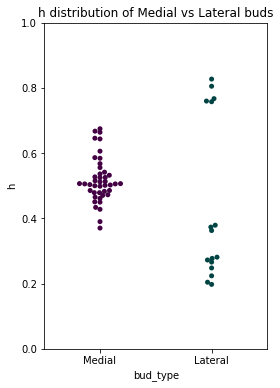

In [55]:
plt.figure(figsize=(4, 6))  

medial_buds['bud_type'] = 'Medial'
true_lateral_buds['bud_type'] = 'Lateral'

combined_df = pd.concat([medial_buds, true_lateral_buds])

sns.swarmplot(data=combined_df, x="bud_type", y="h", hue="bud_type", palette={"Medial": "#430043", "Lateral": "#004343"})
plt.ylim(0, 1)
plt.title('h distribution of Medial vs Lateral buds')
plt.legend().remove()
plt.savefig('lateral_vs_medial_buds_h_distribution.svg' , transparent = True)

In [19]:
no_lat_buds_df.to_csv("nolat_buds_df.csv") # only lateral buds excluded
no_lat_buds_lin_df.to_csv("nolat_buds_lin_df.csv") # lateral buds and their offspring excluded

In [38]:
true_no_lat_buds_lin_df = no_lat_buds_lin_df[~(no_lat_buds_lin_df["lateral_bud"] | no_lat_buds_lin_df["from_lateral_bud"] | no_lat_buds_lin_df["from_lateral_bud_lineage"])]

In [43]:
true_no_lat_buds_lin_df_.to_csv("true_nolat_buds_lin_df.csv") # all lateral buds and their offspring excluded